<font size="+5">#04. Comparacion de Modelos: Arboles de Decision vs Support Vector Machines vs Regresion Logistica</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Usaremos la base de datos del **CIS** sobre una muestra de 2455, cuyas características son de aspecto sociológico. El `objetivo es determinar si una persona usa internet o no`. Ejecutaríamos los siguientes comandos para cargar los datos en nuestro `entorno`.

```python
df = pd.read_csv('https://raw.githubusercontent.com/jesusloplar/data/main/uso_internet_espana.csv')
df.head()
```

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jesusloplar/data/main/uso_internet_espana.csv')
df.head()

,uso_internet,sexo,edad,estudios
0,0,Mujer,66,Primaria
1,1,Hombre,72,Primaria
2,1,Hombre,48,Medios universitarios
3,0,Hombre,59,Superiores
4,1,Mujer,44,Superiores


# Seleccionar Variables para el Modelo

> 1.  Explicativas/Features/Input `X`
> 2.  Objetivo/Class/Target `y`

In [12]:
df = pd.get_dummies(data=df, drop_first=True)

In [13]:
target = df['uso_internet']
explanatory = df.drop(columns='uso_internet')

# Modelo de Árboles de Decisión en Python

> Vamos a aplicar la lógica natural que hemos seguido durante todo el programa. Por tanto, los pasos a seguir son:

```python
model.fit() # calcular los mejores números en la ecuación matemática
model.score() # calcular cómo de bueno es el modelo: Realidad vs Predicción
```

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier()

In [16]:
model.fit(X=explanatory, y=target)

DecisionTreeClassifier()

In [17]:
model.score(X=explanatory, y=target)

0.859877800407332

# Crear Funciones para Automatizar Procesos

> El objetivo de este capítulo es comprender cómo se comparan los diferentes modelos de ML. En este punto concreto del programa, deberíamos saber que los modelos siempre funcionan igual:

```python
model.fit() # calcular los mejores números en la ecuación matemática
model.score() # calcular cómo de bueno es el modelo: Realidad vs Predicción
```

> El modelo a usar es lo único que cambiaría. Por tanto, nos preguntamos lo siguiente: ¿por qué no **crear una función** que te calcule las predicciones directamente al **pasarle un modelo**, como `parametro`? De esta forma podríamos ejecutar las siguientes líneas y entrenar todos los modelos con la misma función.

```python
dt = DecisionTreeClassifier()
calcular_precision(model=dt)

svm = SVC()
calcular_precision(model=svm)

lr = LogisticRegression()
calcular_precision(model = lr)
```

In [21]:
pd.get_dummies()

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,0,66,1,0,1,0,0,0
1,1,72,0,0,1,0,0,0
2,1,48,0,1,0,0,0,0
3,0,59,0,0,0,0,0,1
4,1,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2450,1,43,0,0,1,0,0,0
2451,1,18,1,0,0,1,0,0
2452,0,54,1,0,1,0,0,0
2453,1,31,0,0,0,1,0,0


In [25]:
def calcular_precision(model):

    model.fit(X=explanatory, y=target)

    accuracy= model.score(X=explanatory, y=target)

    return accuracy

## Modelo de Árboles de Decisión

- Aplicamos la función que hemos creado anteriormente en el objeto `DecisionTreeClassifier()`

In [26]:
dt = DecisionTreeClassifier()

In [31]:
calcular_precision(model = dt)

0.859877800407332

## Modelo de Support Vector Machine

- Aplicamos la función que hemos creado anteriormente en el objeto `SVC()`

In [32]:
from sklearn.svm import SVC

In [33]:
sv = SVC()

In [35]:
calcular_precision(model= sv)

0.7934826883910387

## Modelo de Regresión Logística

- Aplicamos la función que hemos creado anteriormente en el objeto `LogisticRegression()`

In [36]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression(max_iter=1000)

In [40]:
calcular_precision(model=lr)

0.8342158859470469

# ¿Cuál es el Mejor Modelo?

> Tomamos la decisión con el modelo que haya tenido mayor precisión porque nos indicaría que ha acertado más veces la realidad.

## Analogía del Examen de Selectividad

> Basándonos en el resultado anterior, elegiríamos el modelo `DecisionTreeClassifier()`. No obstante, los modelos no se están comparando correctamente porque el modelo conocía los datos que trata de predecir. Déjanos explicarte este fenómeno con la siguiente analogía:
>
> 1. Tenemos el examen de selectividad de matemáticas el próximo sábado.
> 2. Disponemos de **100 preguntas con sus 100 soluciones** de años anteriores para estudiar de cara a la prueba final.
> 3. Hoy es lunes y debemos calibrar cómo de preparados estamos de cara al sábado para ver si estudiamos más o menos en los próximos días.
> 4. **Estudiamos las 100 preguntas** con las soluciones al lado.
> 5. Hacemos una prueba sin mirar a las soluciones y vemos que **hemos acertado 90 preguntas**. Por tanto, pensamos que sacaremos un 90 en el examen.
> 6. Llega el examen y las preguntas no son las mismas con las que hemos estudiado.
> 7. Sacamos **40 preguntas acertadas de 100**.
> 8. ¿Qué nos ha pasado?
> 9. Hemos sobreentrenado las preguntas que conocíamos. Sin embargo, nos hubiera gustado ver cómo de preparados estábamos con preguntas con las que no hemos entrenado.
> 10. De la misma manera, nos gustaría evaluar el modelo con datos que no ha usado durante el entrenamiento.
> 11. **La solución**: vamos a separar los datos en Train & Test con la función `train_test_split()`.

# Separar Datos en Train & Test

> **1. Entrenar Modelo con Train**
>
> Al separar los datos en `Entreno` y `Testeo` nos encontraríamos en el siguiente supuesto según la analogía del examen de selectividad:
>
> Estudiamos/Entrenamos `.fit()` para el examen con 70 preguntas `X_train` y respectivas 70 soluciones `y_train`.
>
> - `model.fit(X_train, y_train)`
>
> **2. Realizar Predicciones en Test**
>
> Hacemos un examen `.predict()` de mentira **sin ver las soluciones `y_test`**. Tan solo con lo que sabemos de antes y las **30 nuevas preguntas que no vimos `X_test`** durante el estudio/entrenamiento.
>
> - `y_pred = model.predict(X_test)`
>
> **3. Comparar Predicciones vs Realidad de Test**
>
> Por último veríamos cómo de preparados estamos para el examen de selectividad al comprobar si las respuestas que hemos desarrollado `y_pred` coinciden con las soluciones reales `y_test`.
>
> - `y_pred == y_test`?

# Optimizar Modelos y Comparar Otra Vez

> Ahora deberíamos entrenar un modelo aplicando la lógica que acabamos de exponer: ajustamos la ecuación matemática con los datos de entrenamiento y comprobamos **cómo de bueno es el modelo en los datos de testeo**.

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
a = train_test_split(explanatory, target, test_size=0.30, random_state=42)

In [46]:
type(a)

list

In [49]:
df

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,0,66,1,0,1,0,0,0
1,1,72,0,0,1,0,0,0
2,1,48,0,1,0,0,0,0
3,0,59,0,0,0,0,0,1
4,1,44,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2450,1,43,0,0,1,0,0,0
2451,1,18,1,0,0,1,0,0
2452,0,54,1,0,1,0,0,0
2453,1,31,0,0,0,1,0,0


In [47]:
a[0]

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
198,54,0,0,1,0,0,0
561,50,0,0,0,0,0,1
685,26,0,1,0,0,0,0
1321,62,0,1,0,0,0,0
590,86,1,0,0,0,1,0
...,...,...,...,...,...,...,...
1638,37,1,0,0,1,0,0
1095,35,1,0,0,0,0,0
1130,58,1,0,1,0,0,0
1294,52,1,0,1,0,0,0


In [48]:
a[1]

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1598,52,1,0,1,0,0,0
620,48,0,0,0,0,0,0
1266,53,1,0,0,0,0,1
649,43,0,1,0,0,0,0
1908,43,0,0,0,0,0,0
...,...,...,...,...,...,...,...
377,28,0,0,0,0,0,1
535,35,1,0,0,0,0,0
1535,23,0,0,0,1,0,0
902,38,0,1,0,0,0,0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.33, random_state=42)

In [62]:
def calcular_precision(model):
    
    model.fit(X=X_train, y=y_train)

    y_pred = model.predict(X=X_test)

    (y_pred == y_test).sum()

    mean_pred= (y_pred == y_test).mean()

    return mean_pred

## Modelo de Árboles de Decisión con Train Test Split

- Deberíamos obtener la precisión del `DecisionTreeClassifier()` con los datos de `Testeo`.

In [63]:
calcular_precision(dt)

0.8088779284833539

## Modelo de Support Vector Machine con Train Test Split

- Deberíamos obtener la precisión del `SVC()` con los datos de `Testeo`.

In [64]:
calcular_precision(sv)

0.7891491985203453

## Modelo de Regresión Logística con Train Test Split

- Deberíamos obtener la precisión del `LogisticRegression()` con los datos de `Testeo`.

In [65]:
calcular_precision(lr)

0.8520345252774353

# ¿Cuál es el Mejor Modelo con Train Test Split?

> Tomamos la decisión con el modelo que haya tenido mayor precisión porque nos indicaría que ha acertado más veces la realidad en los datos de `Testeo`.

- El Logistic Regression

# La Importancia del Remuestreo

> Las métricas nos dicen ahora que el mejor modelo es otro...
>
> Qué hubiera pasado si, por cada centésima de fallo `0.01` en datos que no conoce, perdemos 1 Millón de Euros. No sabría deciros en vuestro caso, pero con lo que da la diferencia yo me retiro...
>
> Los modelos pueden ser muy buenos en datos que conocen de antemano durante el entrenamiento. Sin embargo, quisiéramos emplear el modelo en datos que no conoció durante el entrenamiento (predecir si un cliente futuro afrontará un préstamo).
>
> El hecho de haber calibrado nuestro modelo, de ver lo bueno que es nuestro modelo en datos que no conoció **(Test)** durante el entrenamiento **(Train)** hace que nos fiemos mejor de su rendimiento frente a datos que no conoce.
>
> Por tanto, la técnica `train test split` debemos usarla siempre que queramos calibrar cómo de bueno es nuestro modelo.

In [66]:
import seaborn as sns

In [68]:
df = sns.load_dataset('flights')

<AxesSubplot:>

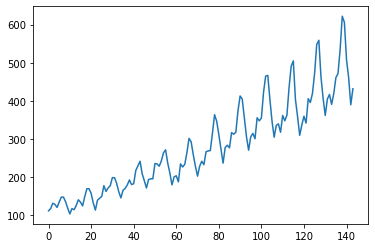

In [70]:
df.passengers.plot(kind='line')

In [71]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [75]:
df['diff1'] = df.passengers.diff()

In [76]:
df.corr()

,year,passengers,diff1
year,1.000000,0.921824,0.016332
passengers,0.921824,1.000000,0.136505
diff1,0.016332,0.136505,1.000000


In [77]:
df['diff2'] = df.passengers.diff(2)

In [78]:
df.corr()

,year,passengers,diff1,diff2
year,1.000000,0.921824,0.016332,0.023753
passengers,0.921824,1.000000,0.136505,0.218117
diff1,0.016332,0.136505,1.000000,0.808632
diff2,0.023753,0.218117,0.808632,1.000000


In [79]:
df['diff3'] = df.passengers.diff(3)

In [80]:
df.corr()

,year,passengers,diff1,diff2,diff3
year,1.000000,0.921824,0.016332,0.023753,0.033606
passengers,0.921824,1.000000,0.136505,0.218117,0.281401
diff1,0.016332,0.136505,1.000000,0.808632,0.600863
diff2,0.023753,0.218117,0.808632,1.000000,0.874471
diff3,0.033606,0.281401,0.600863,0.874471,1.000000


In [81]:
df['diff4'] = df.passengers.diff(4)

In [82]:
df.corr()

,year,passengers,diff1,diff2,diff3,diff4
year,1.000000,0.921824,0.016332,0.023753,0.033606,0.038814
passengers,0.921824,1.000000,0.136505,0.218117,0.281401,0.325402
diff1,0.016332,0.136505,1.000000,0.808632,0.600863,0.434851
diff2,0.023753,0.218117,0.808632,1.000000,0.874471,0.698561
diff3,0.033606,0.281401,0.600863,0.874471,1.000000,0.898030
diff4,0.038814,0.325402,0.434851,0.698561,0.898030,1.000000


In [83]:
for i in range(5, 12):
    df[f'diff{i}'] = df.passengers.diff(i)

<AxesSubplot:>

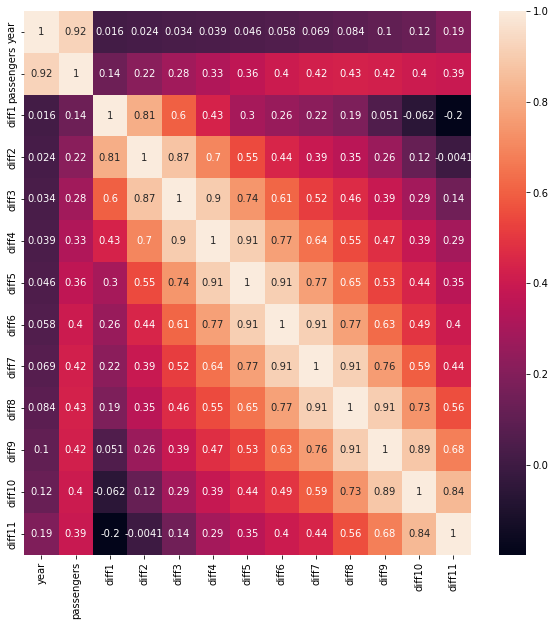

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, )

In [73]:
df.passengers.diff(2)

0        NaN
1        NaN
2       20.0
3       11.0
4      -11.0
       ...  
139     71.0
140   -114.0
141   -145.0
142   -118.0
143    -29.0
Name: passengers, Length: 144, dtype: float64

In [74]:
df.passengers.diff(3)

0        NaN
1        NaN
2        NaN
3       17.0
4        3.0
       ...  
139    134.0
140    -27.0
141   -161.0
142   -216.0
143    -76.0
Name: passengers, Length: 144, dtype: float64